In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sct
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [7]:
#y=生存種子数、x=葉数、f=施肥処理有無(C:あり、T:なし)
path = r'C:\Users\kenta.c.suzuki\Documents\Local_modeling_practice\midoribon\Chap3\data3a.csv'
data = pd.read_csv(path, dtype = {'y':int, 'x':float, 'f':'category'})
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


In [9]:
data.shape

(100, 3)

In [10]:
data.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
      ...  
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, Length: 100, dtype: float64

In [11]:
data.f

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: category
Categories (2, object): [C, T]

In [12]:
data.f.dtype

CategoricalDtype(categories=['C', 'T'], ordered=False)

In [13]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [15]:
data.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

In [16]:
#data.fをcategory型として受け取らない場合、dataをintに変換する必要があるはず
#data.f[data.f = 'C'] = '0'
#data.f[data.f = 'T'] = '1'

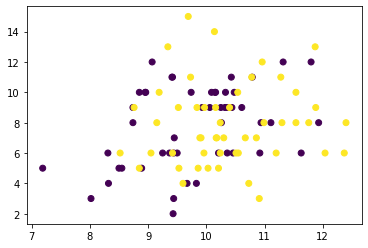

In [17]:
plt.scatter(data.x, data.y, c = data.f.cat.codes)

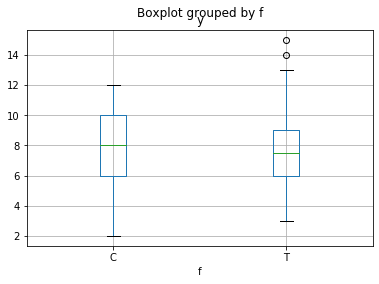

In [18]:
data.boxplot(column='y',by='f')

In [25]:
model = smf.glm('y ~ x', data = data, family = sm.families.Poisson())

In [27]:
result = model.fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 17 Feb 2020   Deviance:                       84.993
Time:                        18:14:30   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [29]:
result.llf #log likelifood

-235.38625076986077

In [30]:
result.df_model

1

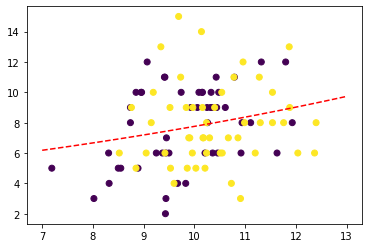

In [31]:
x = np.linspace(7, 13, 100)
y = np.exp(result.params['Intercept'] + x * result.params['x'])

plt.scatter(data.x, data.y, c = data.f.cat.codes)
plt.plot(x, y, 'r--')
plt.show()

In [39]:
model = smf.glm('y ~ f', data = data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 17 Feb 2020   Deviance:                       89.475
Time:                        19:02:48   Pearson chi2:                     87.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

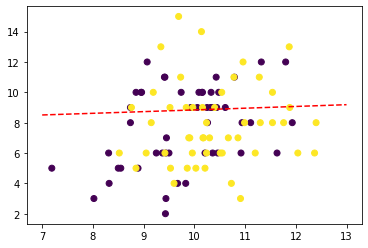

In [40]:
x = np.linspace(7, 13, 100)
y = np.exp(result.params['Intercept'] + x * result.params['f[T.T]'])

plt.scatter(data.x, data.y, c = data.f.cat.codes)
plt.plot(x, y, 'r--')
plt.show()

In [41]:
result.llf

-237.62725696068685

In [42]:
model = smf.glm('y ~ x + f', data = data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Mon, 17 Feb 2020   Deviance:                       84.808
Time:                        19:04:18   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [43]:
result.llf

-235.29371924249367

<font color='f6f6f6'>
以下課題
3つの説明変数でポアソン回帰をやってみよう  
ノースカロライナ州立大学の A. C. linnerud 博士が作成した、20 人の成人男性に対してフィットネスクラブで測定した 3 つの生理学的特徴と 3 つの運動能力の関係  
腹筋の回数を、体重、ウエスト、脈拍に対して当てはめる。
</font>

In [4]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [24]:
target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)
target.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [9]:
len(target)

20

In [10]:
data = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)
data.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [12]:
len(data)

20

(array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 3., 1., 2., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0.]),
 array([ 40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165,
        170]),
 <a list of 26 Patch objects>)

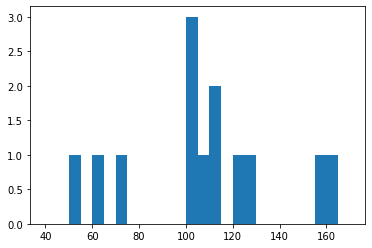

In [21]:
#腹筋回数のヒストグラム
plt.hist(data.get('Situps'), bins = np.arange(40, 175, 5))

In [36]:
#調査ターゲットの身体測定データに、腹筋回数データをマージ
m_data = target.assign(Situps = data['Situps'])
m_data.head()

,Weight,Waist,Pulse,Situps
0,191.0,36.0,50.0,162.0
1,189.0,37.0,52.0,110.0
2,193.0,38.0,58.0,101.0
3,162.0,35.0,62.0,105.0
4,189.0,35.0,46.0,155.0


In [76]:
#weight, waist, pulseを説明変数として、腹筋回数の確率関数を最尤推定
model = smf.glm('Situps ~ Weight + Waist + Pulse', data = m_data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Situps   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -198.44
Date:                Tue, 18 Feb 2020   Deviance:                       262.45
Time:                        18:09:54   Pearson chi2:                     267.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3745      0.375     24.996      0.000       8.639      10.110
Weight         0.0038      0.001      2.614      0.009       0.001       0.007
Waist         -0.1405      0.012    -11.297      0.000      -0.165      -0.116
Pulse         -0.0028      0.003     -1.061      0.289      -0.008       0.002
==============================================================================
"""

In [77]:
result.llf

-198.4396038377697

In [78]:
llf_array = pd.DataFrame({'WeightWaistPulse' : [result.llf]})

In [79]:
#weight, waistを説明変数として、腹筋回数の確率関数を最尤推定
model = smf.glm('Situps ~ Weight + Waist', data = m_data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Situps   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -199.00
Date:                Tue, 18 Feb 2020   Deviance:                       263.58
Time:                        18:10:09   Pearson chi2:                     267.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1005      0.271     33.541      0.000       8.569       9.632
Weight         0.0038      0.001      2.634      0.008       0.001       0.007
Waist         -0.1371      0.012    -11.519      0.000      -0.160      -0.114
==============================================================================
"""

In [80]:
llf_array['WeightWaist'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist
0,-198.439604,-199.00391


In [81]:
model = smf.glm('Situps ~ Weight + Pulse', data = m_data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Situps   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -262.58
Date:                Tue, 18 Feb 2020   Deviance:                       390.74
Time:                        18:11:31   Pearson chi2:                     381.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4843      0.266     24.415      0.000       5.964       7.005
Weight        -0.0092      0.001    -10.040      0.000      -0.011      -0.007
Pulse          0.0021      0.003      0.733      0.464      -0.003       0.008
==============================================================================
"""

In [82]:
llf_array['WeightPulse'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist,WeightPulse
0,-198.439604,-199.00391,-262.583588


In [83]:
model = smf.glm('Situps ~ Waist + Pulse', data = m_data, family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Situps   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.85
Date:                Tue, 18 Feb 2020   Deviance:                       269.26
Time:                        18:12:18   Pearson chi2:                     273.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2067      0.370     24.886      0.000       8.482       9.932
Waist         -0.1162      0.008    -13.984      0.000      -0.133      -0.100
Pulse         -0.0029      0.003     -1.113      0.266      -0.008       0.002
==============================================================================
"""

In [84]:
llf_array['WaistPulse'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist,WeightPulse,WaistPulse
0,-198.439604,-199.00391,-262.583588,-201.846553


In [85]:
model = smf.glm('Situps ~ Weight', data = m_data, family = sm.families.Poisson())
result = model.fit()

llf_array['Weight'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist,WeightPulse,WaistPulse,Weight
0,-198.439604,-199.00391,-262.583588,-201.846553,-262.851326


In [86]:
model = smf.glm('Situps ~ Waist', data = m_data, family = sm.families.Poisson())
result = model.fit()

llf_array['Waist'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist,WeightPulse,WaistPulse,Weight,Waist
0,-198.439604,-199.00391,-262.583588,-201.846553,-262.851326,-202.467125


In [87]:
model = smf.glm('Situps ~ Pulse', data = m_data, family = sm.families.Poisson())
result = model.fit()

llf_array['Pulse'] = result.llf
llf_array

,WeightWaistPulse,WeightWaist,WeightPulse,WaistPulse,Weight,Waist,Pulse
0,-198.439604,-199.00391,-262.583588,-201.846553,-262.851326,-202.467125,-316.460344


<font color = f6f6f6>
    最尤推定量が最大となるのは、weight, waist, pulseを説明変数としたときとなるのが分かった
</font>

In [88]:
model = smf.glm('Situps ~ Weight + Waist + Pulse', data = m_data, family = sm.families.Poisson())
result = model.fit()
m_data['predict'] = result.predict(m_data[['Weight', 'Waist', 'Pulse']])

In [89]:
m_data

,Weight,Waist,Pulse,Situps,predict
0,191.0,36.0,50.0,162.0,135.313534
1,189.0,37.0,52.0,110.0,116.034189
2,193.0,38.0,58.0,101.0,100.691375
3,162.0,35.0,62.0,105.0,134.831650
4,189.0,35.0,46.0,155.0,156.262495
5,182.0,36.0,56.0,101.0,128.583793
6,211.0,38.0,56.0,101.0,108.465528
7,167.0,34.0,60.0,125.0,159.048658
8,176.0,31.0,74.0,200.0,241.411308
9,154.0,33.0,56.0,251.0,176.105500


Text(0, 0.5, 'predict')

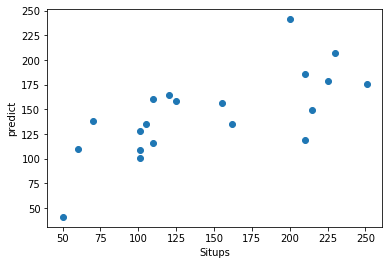

In [90]:
plt.scatter(m_data.Situps, m_data.predict)
plt.xlabel('Situps')
plt.ylabel('predict')